# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import os

# Untuk ignore warning
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

with ZipFile('telco-customer-churn-ibm-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 820MB/s]


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df = pd.read_excel('dataset/Telco_customer_churn.xlsx')

# Tampilkan 5 baris pertama
df.head()

# Cek informasi dataset
df.info()

# Cek deskripsi statistik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


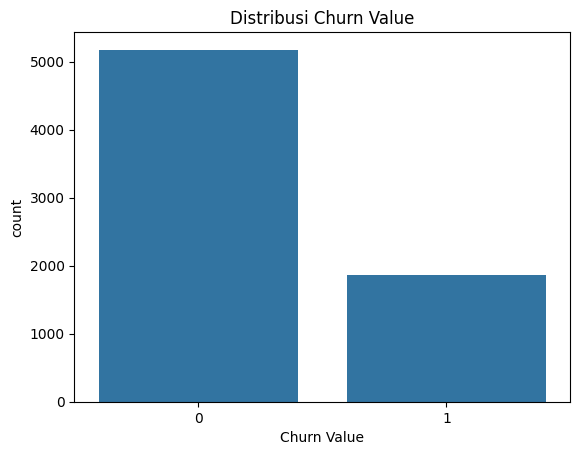

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64
Total Charges kosong: 11


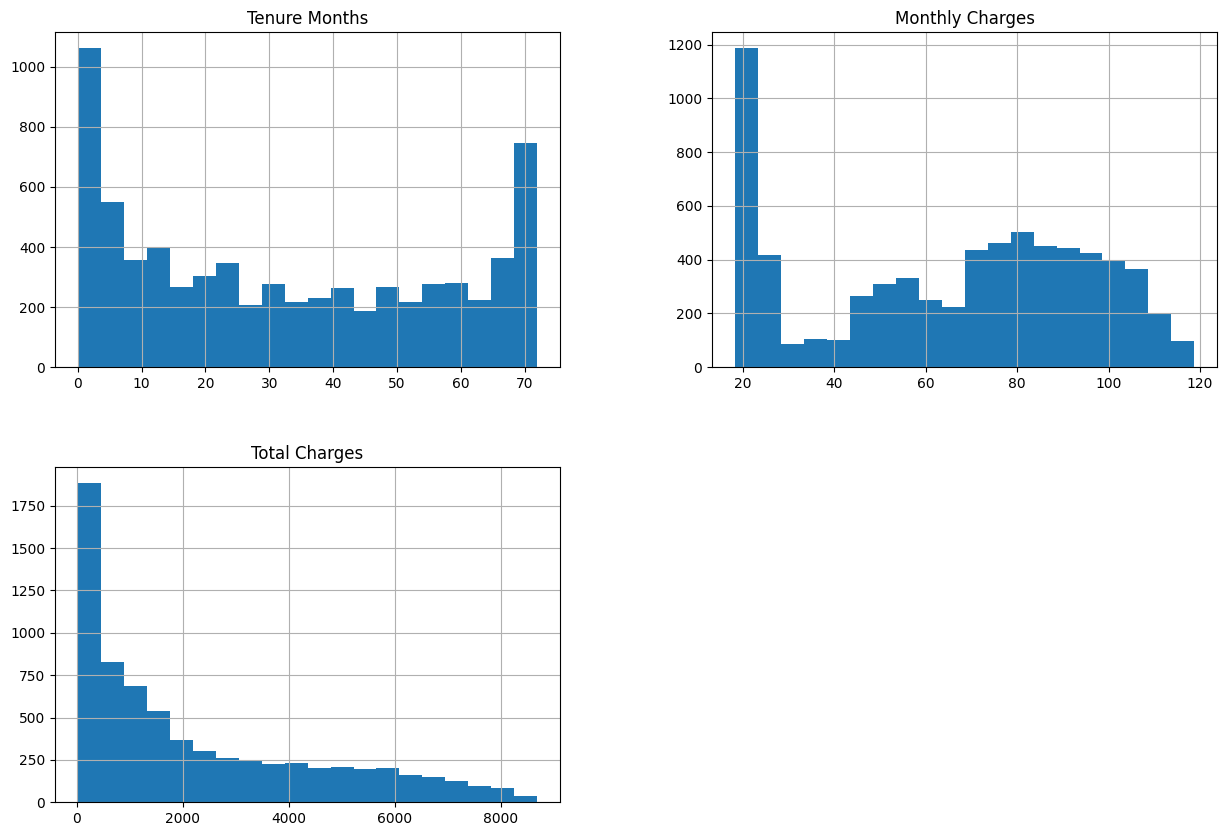

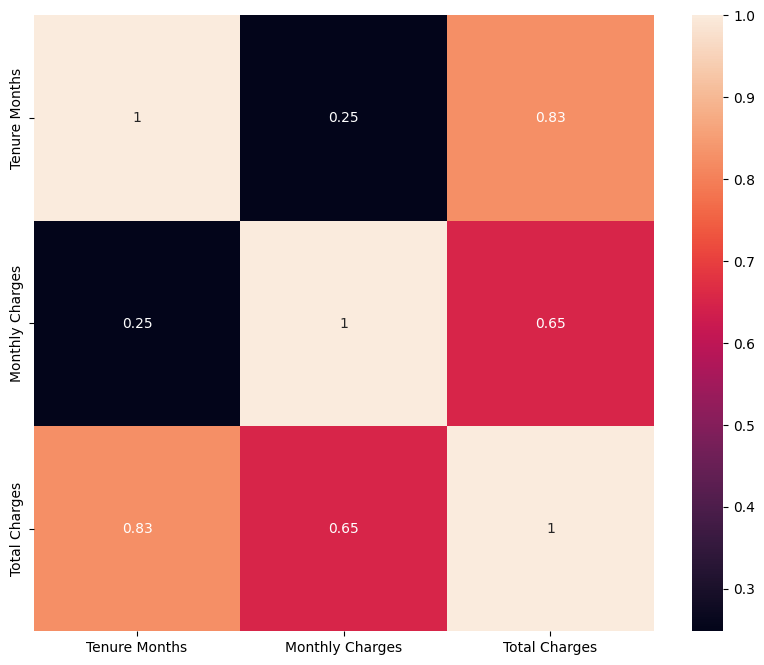

In [4]:
# Distribusi target
sns.countplot(x='Churn Value', data=df)
plt.title("Distribusi Churn Value")
plt.show()

# Cek missing values
print(df.isnull().sum())

# Cek Total Charges kosong
print("Total Charges kosong:", sum(df['Total Charges'].str.strip() == ''))

# Distribusi numerik
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
# Convert Total Charges ke float
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

# Korelasi antar numerik
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# Drop kolom yang tidak diperlukan
drop_cols = ['CustomerID','Count','Country','State','City','Zip Code','Lat Long',
             'Latitude','Longitude','Churn Label','Churn Score','Churn Reason']
df.drop(columns=drop_cols, inplace=True)

# Handling missing Total Charges
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

# Pisahkan fitur kategori & numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Encode kategori
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scaling numerik
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split X dan y
X = df.drop(columns=['Churn Value'])
y = df['Churn Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil akhir
X_train.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
2142,1,0,1,0,1.572981,1,2,1,0,0,2,0,2,2,1,1,1,1.126310,2.066537,0.592325
1623,0,0,0,0,-0.666639,1,0,1,0,2,2,0,0,2,0,1,1,0.945174,-0.312663,0.927074
6074,0,0,0,0,-0.015113,1,2,1,0,2,2,0,2,2,1,1,1,1.305784,0.501050,-1.745852
1362,0,1,1,0,-0.340876,0,1,0,0,0,2,0,0,2,0,1,1,-0.801375,-0.595387,-0.471098
6754,0,0,1,1,-0.503758,1,0,2,1,1,1,1,1,1,0,0,3,-1.486035,-0.828157,-1.438998


In [8]:
# Definisikan nama folder
output_folder = 'processed_data'

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Simpan data hasil preprocessing ke file CSV di dalam folder
X_train.to_csv(os.path.join(output_folder, 'X_train_processed.csv'), index=False)
X_test.to_csv(os.path.join(output_folder, 'X_test_processed.csv'), index=False)
y_train.to_csv(os.path.join(output_folder, 'y_train_processed.csv'), index=False)
y_test.to_csv(os.path.join(output_folder, 'y_test_processed.csv'), index=False)

print(f"Data preprocessing selesai dan data disimpan ke folder '{output_folder}'.")

Data preprocessing selesai dan data disimpan ke folder 'processed_data'.


In [9]:
from google.colab import files
import os

# Definisikan nama folder yang ingin diunduh
folder_to_download = 'processed_data'

# Periksa apakah folder ada sebelum mencoba mengunduh
if os.path.exists(folder_to_download):
    # Kompres folder menjadi file zip (opsional tapi direkomendasikan untuk folder)
    # Menggunakan shutil bisa jadi alternatif, tapi command line zip lebih sederhana di Colab
    !zip -r /content/{folder_to_download}.zip {folder_to_download}

    # Unduh file zip
    files.download(f'/content/{folder_to_download}.zip')
    print(f"Folder '{folder_to_download}' berhasil diunduh sebagai '{folder_to_download}.zip'")
else:
    print(f"Error: Folder '{folder_to_download}' tidak ditemukan.")

  adding: processed_data/ (stored 0%)
  adding: processed_data/y_test_processed.csv (deflated 89%)
  adding: processed_data/X_test_processed.csv (deflated 67%)
  adding: processed_data/y_train_processed.csv (deflated 91%)
  adding: processed_data/X_train_processed.csv (deflated 68%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Folder 'processed_data' berhasil diunduh sebagai 'processed_data.zip'
